# Less Than oracle

inspirated by the Javier Sanchez-Rivero, Daniel Talaván, Jose Garcia-Alonso, Antonio Ruiz-Cortés and Juan Manuel Murillo paper, which you can find [here](https://arxiv.org/abs/2303.14959).\
Here are my thoughts and implementation of this algorithm.

In [1]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
import math
from utils import get_image_path

In [2]:
def show_unitary(qc):
    sim = AerSimulator()
    qc_unitary = qc.copy()
    qc_unitary.save_unitary()
    unitary = sim.run(transpile(qc_unitary, sim), shots=1000).result().get_unitary()
    display(array_to_latex(unitary, max_size=100000))

In [3]:
def plot_results(qc):
    sim = AerSimulator()
    result = sim.run(transpile(qc, sim), shots=1000).result().get_counts()
    display(plot_histogram(result))

In [4]:
_3_qubits_iterator = range(3)

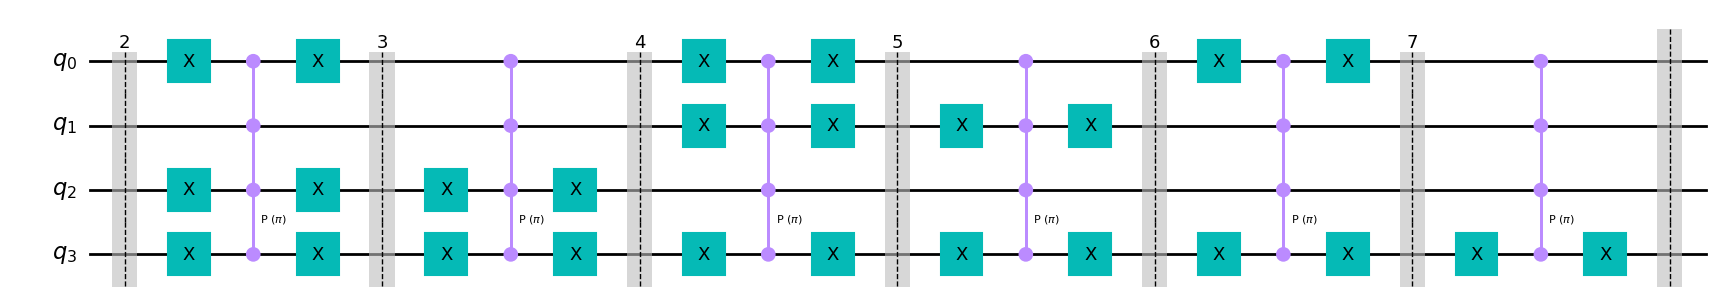

<IPython.core.display.Latex object>

In [5]:
"""
from 2 to 7

0010
0011
0100
0101
0110
0111

"""

oracle = QuantumCircuit(4, name="oracle")

#0010
oracle.barrier(label="2")
oracle.x([0, 2, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([0, 2, 3])

#0011
oracle.barrier(label="3")
oracle.x([2, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([2, 3])

#0100
oracle.barrier(label="4")
oracle.x([0, 1, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([0, 1, 3])

#0101
oracle.barrier(label="5")
oracle.x([1, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([1, 3])

#0110
oracle.barrier(label="6")
oracle.x([0, 3])
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x([0, 3])

#0111
oracle.barrier(label="7")
oracle.x(3)
oracle.mcp(math.pi, list(range(1, 4)), 0)
oracle.x(3)

oracle.barrier()

display(oracle.draw('mpl')) 
show_unitary(oracle)

In [62]:
def diffuser(n_qubits):
    iterator_n_qubits = range(n_qubits)
    diffuser = QuantumCircuit(n_qubits, name="diffuser")
    diffuser.h(iterator_n_qubits)
    diffuser.x(iterator_n_qubits)
    diffuser.h(0)
    diffuser.mct(list(range(1, n_qubits)), 0)
    diffuser.h(0)
    diffuser.x(iterator_n_qubits)
    diffuser.h(iterator_n_qubits)
    return diffuser

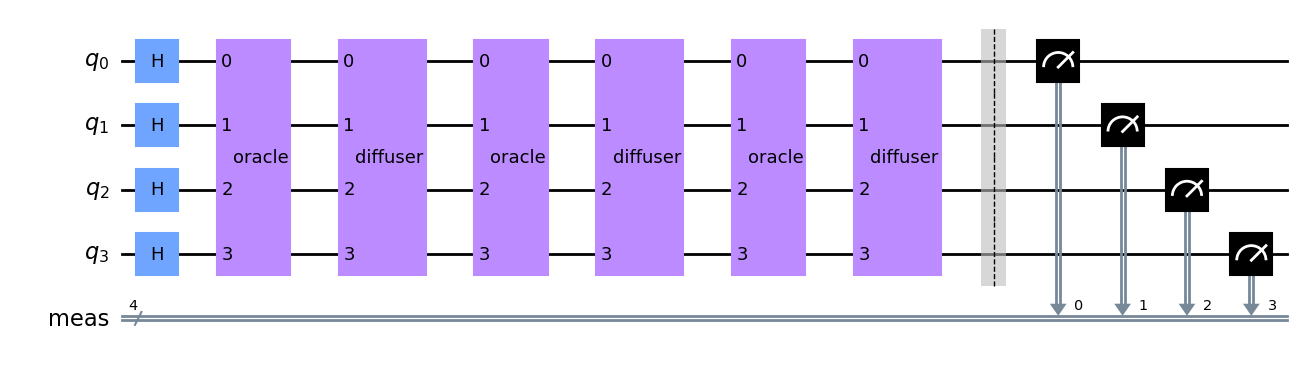

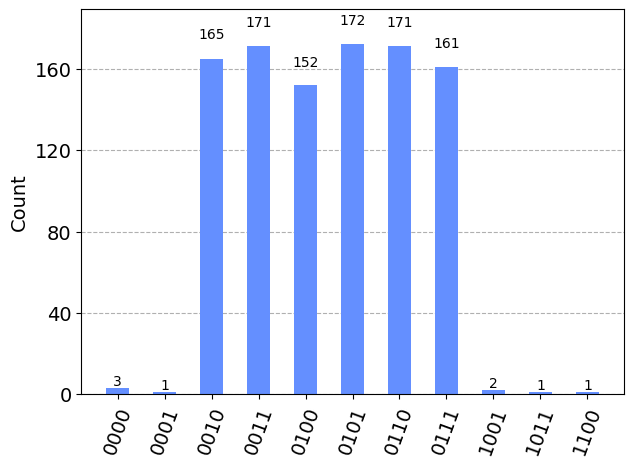

In [7]:
qc_test_1 = QuantumCircuit(4)
diffuser_test_1 = diffuser(4)
iterator_4_qubits = range(4)
qc_test_1.h(iterator_4_qubits)
qc_test_1.append(oracle, iterator_4_qubits)
qc_test_1.append(diffuser_test_1, iterator_4_qubits)
qc_test_1.append(oracle, iterator_4_qubits)
qc_test_1.append(diffuser_test_1, iterator_4_qubits)
qc_test_1.append(oracle, iterator_4_qubits)
qc_test_1.append(diffuser_test_1, iterator_4_qubits)
qc_test_1.measure_all()
display(qc_test_1.draw('mpl'))
plot_results(qc_test_1)

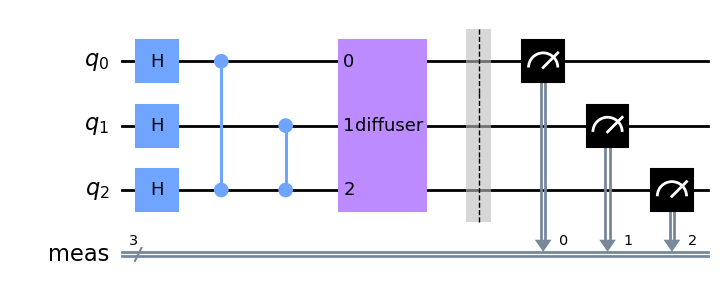

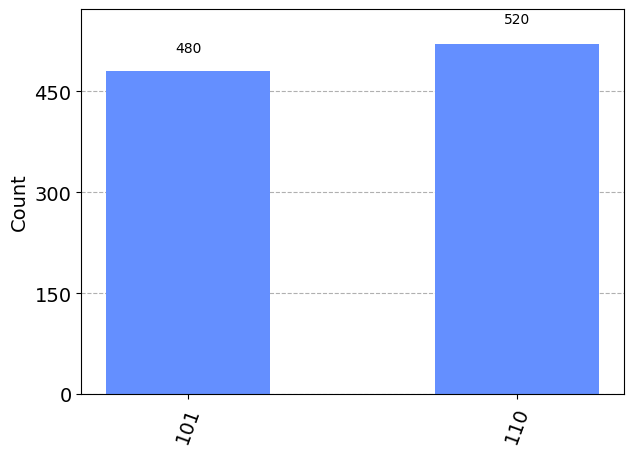

In [8]:
qc_test_2 = QuantumCircuit(3)
qc_test_2.h(_3_qubits_iterator)
qc_test_2.cz(2, 0)
qc_test_2.cz(1, 2)
qc_test_2.append(diffuser(3), _3_qubits_iterator)
qc_test_2.measure_all()
display(qc_test_2.draw('mpl'))
plot_results(qc_test_2)

---

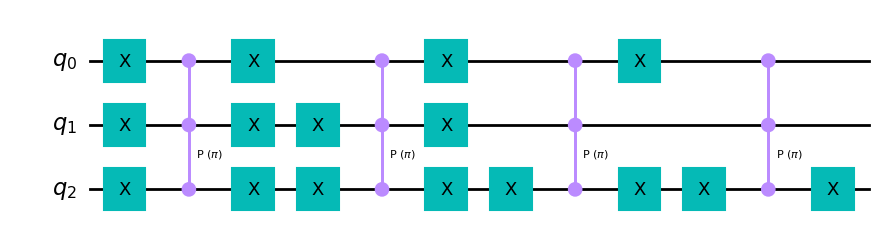

<IPython.core.display.Latex object>

In [8]:
oracle_less_than_4 = QuantumCircuit(3, name="<4")

#000
oracle_less_than_4.x(_3_qubits_iterator)
oracle_less_than_4.mcp(math.pi, [2, 1], 0)
oracle_less_than_4.x(_3_qubits_iterator)

#001
oracle_less_than_4.x(range(1, 3))
oracle_less_than_4.mcp(math.pi, [2, 1], 0)
oracle_less_than_4.x(range(1, 3))

#010
oracle_less_than_4.x([0, 2])
oracle_less_than_4.mcp(math.pi, [2, 1], 0)
oracle_less_than_4.x([0,2])

#011
oracle_less_than_4.x(2)
oracle_less_than_4.mcp(math.pi, [2, 1], 0)
oracle_less_than_4.x(2)

display(oracle_less_than_4.draw('mpl'))
show_unitary(oracle_less_than_4)

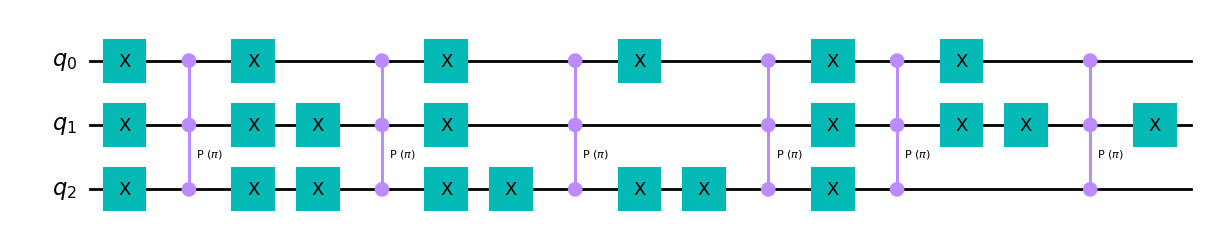

<IPython.core.display.Latex object>

In [7]:
oracle_less_than_6 = QuantumCircuit(3, name="<6")

#000
oracle_less_than_6.x(_3_qubits_iterator)
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(_3_qubits_iterator)

#001
oracle_less_than_6.x(range(1, 3))
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(range(1, 3))

#010
oracle_less_than_6.x([0, 2])
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x([0,2])

#011
oracle_less_than_6.x(2)
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(2)

#100
oracle_less_than_6.x(range(0, 2))
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(range(0, 2))

#101
oracle_less_than_6.x(1)
oracle_less_than_6.mcp(math.pi, [2, 1], 0)
oracle_less_than_6.x(1)

display(oracle_less_than_6.draw('mpl'))
show_unitary(oracle_less_than_6)

In [63]:
grover_diffuser = diffuser(3)

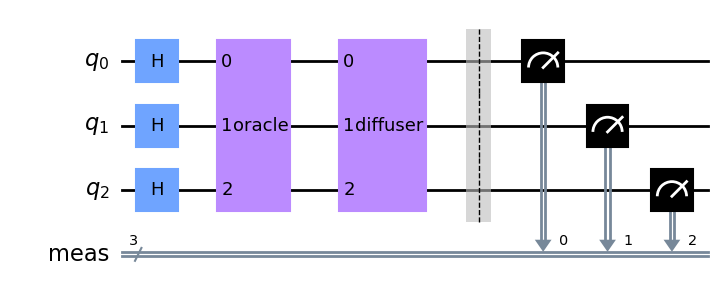

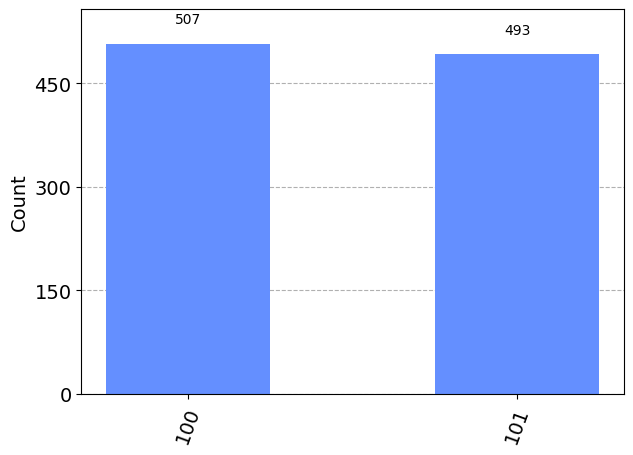

In [58]:
grover_oracle = QuantumCircuit(3, name="oracle")
grover_oracle.append(oracle_less_than_4, _3_qubits_iterator)
grover_oracle.append(oracle_less_than_6, _3_qubits_iterator)

qc_test_3 = QuantumCircuit(3)
qc_test_3.h(_3_qubits_iterator)
qc_test_3.append(grover_oracle, _3_qubits_iterator)
qc_test_3.append(grover_diffuser, _3_qubits_iterator)
qc_test_3.measure_all()

display(qc_test_3.draw('mpl'))
plot_results(qc_test_3)

---

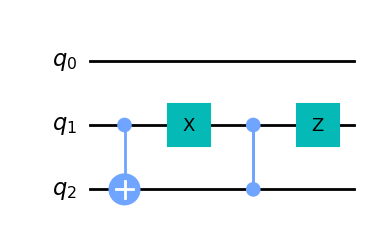

<IPython.core.display.Latex object>

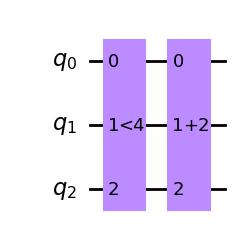

<IPython.core.display.Latex object>

In [111]:
add_two_oracle = QuantumCircuit(3, name="+2")
add_two_oracle.cx(1, 2)
add_two_oracle.x(1)
add_two_oracle.cz(1, 2)
add_two_oracle.z(1)

display(add_two_oracle.draw('mpl'))
show_unitary(add_two_oracle)

oracle_2 = QuantumCircuit(3, name="oracle")
oracle_2.append(oracle_less_than_4, _3_qubits_iterator)
oracle_2.append(add_two_oracle, _3_qubits_iterator)
display(oracle_2.draw('mpl'))
show_unitary(oracle_2)

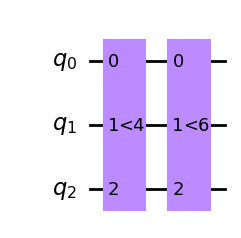

In [9]:
qc = QuantumCircuit(3, name="oracle")
qc.append(oracle_less_than_4, _3_qubits_iterator)
qc.append(oracle_less_than_6, _3_qubits_iterator)
qc.draw('mpl', filename=get_image_path("less_than.png"))

In [10]:
show_unitary(qc)

<IPython.core.display.Latex object>